# Machine Learning

This notebook is supposed to be an introduction to Machine Learning with Python for DSRers, who may have no clue in ML, but know a little bit of Python.

It's the first time this notebook is being used, mainly because:

- Everything in one large notebook instead of several smaller ones.

- To harmonize the content of the notebooks with the order of the slides.

- Substantially extending on typical interview questions, which I think is the main result you will get from "all the theory".

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Autoreload modules
%load_ext autoreload
%autoreload 2

# Standard settings I do
plt.rcParams['savefig.dpi'] = 80

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 20, 12
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = False # True activates latex output in fonts!
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

In [2]:
!pip install seaborn

What are you going to learn? Well, mainly working with __scikit-learn__ and being able to use the models learned in the slides in a concrete implementation as well as judging your results (and assuring they are correct).

### Datasets 

We will start to work with the scikit learn datasets. There are three groups: `make` for synthetic, `load` for small datasets contained in sklearn, and `fetch` for (possibly larger) datasets that have to be downloaded once (they are usually stored in your user directory)

In [3]:
from sklearn.datasets import fetch_20newsgroups, load_iris, make_blobs

In [4]:
def sns_palette_to_cmap(palette):
    from matplotlib.colors import ListedColormap
    return ListedColormap(palette.as_hex())

def get_cmap(n_classes):
    return sns_palette_to_cmap(sns.hls_palette(n_classes))

In [5]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, random_state=42)
n_classes = len(np.unique(y))
cmap = get_cmap(n_classes) # just to keep things standard

In [6]:
y

array([1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 1,
       2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0,
       1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1, 2,
       1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2,
       0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2,
       1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1,
       0, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0,
       1, 1])

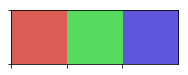

In [7]:
sns.palplot(sns.hls_palette(n_classes))

Text(0.5,1,'Three blobs in the plane')

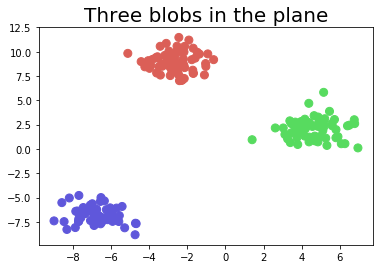

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.title("Three blobs in the plane")

Let's try the first model we have discussed: k-NN:

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=1)
# fit = does the training = the learning
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

With `score` one gets the metric the model was optimized for.

In [11]:
print("%.3f" % (knn.score(X, y)))

1.000


In [12]:
def plot_decision_surface(X, y, clf, n_classes=None):
    
    if n_classes is None:
        n_classes = len(np.unique(y))

    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    colmap_light = sns_palette_to_cmap(sns.hls_palette(n_classes, l=.8, s=.6))
    colmap_dark = sns_palette_to_cmap(sns.hls_palette(n_classes, l=.5, s=1.))
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=colmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colmap_dark)
    plt.axis('tight')

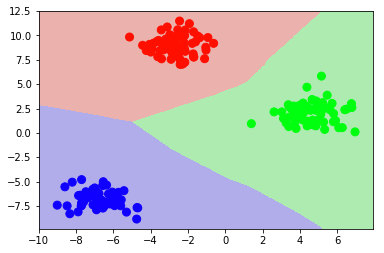

In [13]:
plot_decision_surface(X, y, knn)

_Exercise_: Build a k-NN classifier for this data set.
Judge visually whether this will be good.

In [14]:
from sklearn.datasets import make_gaussian_quantiles

In [15]:
X, y = make_gaussian_quantiles(n_samples=200, n_classes=5, random_state=42)
n_classes = len(np.unique(y))
cmap = get_cmap(n_classes) # just to keep things standard

In [16]:
knn = KNeighborsClassifier(5)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
knn.score(X, y)

0.87

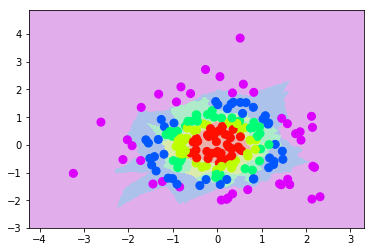

In [18]:
plot_decision_surface(X, y, knn)

## Linear Regression 

In [19]:
from sklearn.datasets import load_boston

boston = load_boston()

In [20]:
print("Features %s" % boston.feature_names)
print(boston.DESCR)

Features ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX    

In [21]:
X, y = boston.data, boston.target
print(X.shape, y.shape)

(506, 13) (506,)


In [22]:
df = pd.DataFrame(boston.data)
df.columns = ['crime_rate','res_land_zoned','industry','charles_river','nox','avg_num_rooms','prop_bf_1940','dst_emply_center','rd_highway_idx','tax_rate','stdnt_tchr_ratio','prop_blacks','low_status_pct']

In [23]:
df.head(10)

,crime_rate,res_land_zoned,industry,charles_river,nox,avg_num_rooms,prop_bf_1940,dst_emply_center,rd_highway_idx,tax_rate,stdnt_tchr_ratio,prop_blacks,low_status_pct
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


## Least Squares 

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
least_squares = LinearRegression(normalize=True)

In [26]:
least_squares.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

Text(0.5,1,'Weights of least squares')

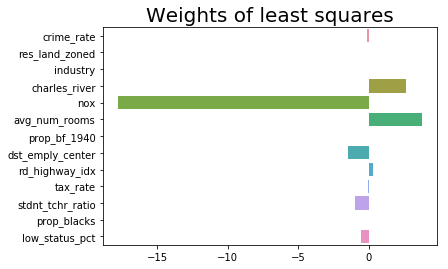

In [27]:
sns.barplot(x=least_squares.coef_, y=df.columns, orient="h")
plt.title("Weights of least squares")

But how good is our model on the data?

In [28]:
least_squares.score(X, y) # R^2

0.7406077428649427

In [29]:
LinearRegression??

The `score` method always returns the metric the model has been optimized for. The `sklearn.metrics` package contains all kinds of metrics.

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
y_pred = least_squares.predict(X) # computes the predictions
mean_squared_error(y, y_pred)

21.8977792176875

In [32]:
y_pred[:10]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232,
       25.25940048, 23.00433994, 19.5347558 , 11.51696539, 18.91981483])

## An unpleasant surprise

But in reality our model has to form predictions on *unseen* data. Let's model this situation.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)

In [34]:
train_test_split??

In [35]:
LinearRegression.score??

In [36]:
print(X_train.shape, X_test.shape, X.shape)

(379, 13) (127, 13) (506, 13)


In [37]:
least_squares.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [38]:
print("Train score: %.4f" % least_squares.score(X_train, y_train))
print("Test score: %.4f" % least_squares.score(X_test, y_test))

Train score: 0.7481
Test score: 0.6840


The test score is way worse! This is the effect of overfitting.

*Exercise*: Compute the MSE for the train and test set. How does it compare to the situation before?

In [39]:
# %load ./solutions/mse.py
y_pred_train = least_squares.predict(X_train)
y_pred_test = least_squares.predict(X_test)

print("Train MSE: %.4f" % mean_squared_error(y_pred_train, y_train))
print("Test MSE: %.4f" % mean_squared_error(y_pred_test, y_test))

Train MSE: 22.3385
Test MSE: 22.1317


In [40]:
from statsmodels.regression.linear_model import OLS

In [41]:
!pip install statsmodels

In [42]:
least_squares = OLS(y_train, X_train)

In [43]:
res = least_squares.fit()

In [44]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     693.6
Date:                Fri, 20 Apr 2018   Prob (F-statistic):          1.29e-248
Time:                        10:33:15   Log-Likelihood:                -1139.5
No. Observations:                 379   AIC:                             2305.
Df Residuals:                     366   BIC:                             2356.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1158      0.040     -2.867      0.004      -0.195      -0.036
x2             0.0342      0.017      1.986      0.048       0.000       0.068
x3             0.0437      0.072      0.610      0.542      -0.097       0.184
x4             2.7343      1.006      2.717      0.007       0.755       4.713
x5            -4.1466      3.865     -1.073      0.284     -11.748       3.454
x6             6.0703      0.356     17.056      0.000       5.370       6.770
x7            -0.0138      0.016     -0.869      0.386      -0.045       0.017
x8            -0.9692      0.229     -4.240      0.000      -1.419      -0.520
x9             0.1369      0.077      1.767      0.078      -0.015       0.289
x10           -0.0073      0.004     -1.631      0.104      -0.016       0.002
x11           -0.4654      0.124     -3.762      0.000      -0.709      -0.222
x12            0.0178      0.003      5.638      0.000       0.012       0.024
x13           -0.4404      0.057     -7.688      0.000      -0.553      -0.328
==============================================================================
Omnibus:                      146.159   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              978.240
Skew:                           1.470   Prob(JB):                    3.78e-213
Kurtosis:                      10.301   Cond. No.                     8.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Other models...

Try other models, play with the parameters and try to beat the best score!

*Extra*: Inspect the features not used by the Lasso model and remove them from the feature set. Does this improve the performance of all (others included!) models?

In [45]:
!pip freeze | grep statsmodels

statsmodels==0.8.0


In [46]:
from sklearn.linear_model import Ridge # L_2
from sklearn.linear_model import Lasso # L_1
from sklearn.linear_model import ElasticNet # convex(L_1, L_2)

In [47]:
lasso = Lasso(alpha=5e-2, normalize=True)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.31541428, -0.        ,
        4.18252691, -0.        , -0.        , -0.        , -0.        ,
       -0.55187472,  0.00475577, -0.49931538])

In [49]:
print("Train score: %.4f" % lasso.score(X_train, y_train))
print("Test score: %.4f" % lasso.score(X_test, y_test))

Train score: 0.6803
Test score: 0.6296


In [50]:
used_features = lasso.coef_ != 0.0
print(used_features)

[False False False  True False  True False False False False  True  True
  True]


In [51]:
X_reduced = X[:, used_features]

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, random_state=42)

$\lambda$ must be lowered because there is less noise to learn from.

In [52]:
lasso = Lasso(alpha=0.01, normalize=True)
lasso.fit(X_train_red, y_train_red)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
print("Train score: %.4f" % lasso.score(X_train_red, y_train_red))
print("Test score: %.4f" % lasso.score(X_test_red, y_test_red))

Train score: 0.7096
Test score: 0.6319


## Polynomial Regression

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [55]:
clf_pipe = make_pipeline(
    PolynomialFeatures(degree=5),
    ElasticNet(alpha=0.001, 
               l1_ratio=0.3, 
               normalize=True, 
               random_state=42, 
               max_iter=1000)
)

clf_pipe.fit(X_train, y_train)

/Users/uberwach/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('elasticnet', ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.3,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])

In [56]:
from sklearn.externals import joblib

In [57]:
joblib.dump(clf_pipe, "pipeline_v01.pkl", compress=5)

['pipeline_v01.pkl']

In [58]:
my_pipe = joblib.load("pipeline_v01.pkl")

In [59]:
my_pipe

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('elasticnet', ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.3,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])

In [60]:
poly_feats = PolynomialFeatures(degree=5)
X_poly = poly_feats.fit_transform(X)

# poly_feats.fit(X)
# X_poly = poly_feats.transform(X)

In [61]:
X.shape

(506, 13)

In [62]:
X_poly.shape

(506, 8568)

In [63]:
print("Train score: %.4f" % clf_pipe.score(X_train, y_train))
print("Test score: %.4f" % clf_pipe.score(X_test, y_test))

Train score: 0.9424
Test score: 0.8450


In [64]:
from sklearn.metrics import r2_score

In [65]:
r2_score(y_test, clf_pipe.predict(X_test))

0.8449717443971803

In [66]:
clf_pipe.steps

[('polynomialfeatures',
  PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)),
 ('elasticnet',
  ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.3,
        max_iter=1000, normalize=True, positive=False, precompute=False,
        random_state=42, selection='cyclic', tol=0.0001, warm_start=False))]

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.model_selection import RandomizedSearchCV

params = {
    "polynomialfeatures__degree": [1, 2, 3, 4, 5],
    "elasticnet__alpha": [10**i for i in range(-1, 2)],
    "elasticnet__l1_ratio": np.linspace(0.1, 0.9, 3)
}

clf_pipe = make_pipeline(
    PolynomialFeatures(),
    ElasticNet(normalize=True, max_iter=5000, random_state=42)
)

grid = GridSearchCV(clf_pipe, params, scoring="r2", verbose=True, cv=KFold(3, random_state=42))
grid.fit(X_train, y_train)

grid.cv_results_

grid.best_estimator_

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.3s finished


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('elasticnet', ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=5000, normalize=True, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])

In [107]:
print(grid.cv_results_)

{'mean_fit_time': array([0.00076969, 0.00072654, 0.0006849 , 0.00102933, 0.00075531,
       0.00053136, 0.00053938, 0.00057069, 0.00179497, 0.00075308,
       0.00053938, 0.0007089 , 0.00059533, 0.00080037, 0.00074204,
       0.00048272, 0.00052174, 0.00053573, 0.0005943 , 0.0006125 ,
       0.0005064 , 0.00050465, 0.00055718, 0.00056966, 0.00061138,
       0.00047596, 0.00049273, 0.00052404, 0.00058937, 0.00063205,
       0.00050529, 0.00071065, 0.0006357 , 0.00061162, 0.00063761,
       0.00054638, 0.00074633, 0.00073131, 0.00063825, 0.00076667,
       0.0005033 , 0.00066932, 0.00067933, 0.00056569, 0.00066098]), 'std_fit_time': array([1.94971433e-04, 1.05136256e-04, 1.29368000e-04, 1.02477718e-04,
       1.11977739e-04, 2.81497760e-05, 7.69943959e-06, 4.54212250e-05,
       1.41875578e-03, 3.69163196e-05, 1.94690665e-05, 2.49624467e-04,
       8.62695372e-05, 2.43499110e-04, 9.05397148e-05, 1.00198857e-05,
       4.05850395e-05, 1.74105429e-05, 3.31063368e-05, 1.27652315e-06,
      

# Linear Classification

## Preamble the data set

We are using Fisher's famous <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris data set</a>. The goal is to classify flowers from the Iris family into one of three species, that look as follows:

<table>
<tr>
<td> <img src="figures/iris_setosa.jpg" width="200" style="height:150px"/> </td>
<td> <img src="figures/iris_versicolor.jpg" width="200" style="height:150px"/> </td>
<td> <img src="figures/iris_virginica.jpg" width="200" style="height:150px"/> </td>
</tr>

<tr> 
<td>Iris Setosa</td>
<td>Iris Versicolor</td>
<td>Iris Virginica</td>
</tr>
</table>

Our data set contains 50 flowers from each class, thus 150 in total. There are four features, the length and width of the petal (dt. Kronblatt) and sepal (dt. Kelchblatt) in centimetres.

<img src="figures/petal_sepal.jpg" width="400" style="height:300px"/>

The data set is distributed with sci-kit learn, the only thing we have to do is to important a function and call it.

In [108]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
print(type(X))
print(X.shape)

print("First three rows of data\n %s" % X[:3])
print("First three labels: %s" % (y[:3]))

<class 'numpy.ndarray'>
(150, 4)
First three rows of data
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
First three labels: [0 0 0]


In [109]:
import numpy as np

In [110]:
np.ravel(X)

array([5.1, 3.5, 1.4, 0.2, 4.9, 3. , 1.4, 0.2, 4.7, 3.2, 1.3, 0.2, 4.6,
       3.1, 1.5, 0.2, 5. , 3.6, 1.4, 0.2, 5.4, 3.9, 1.7, 0.4, 4.6, 3.4,
       1.4, 0.3, 5. , 3.4, 1.5, 0.2, 4.4, 2.9, 1.4, 0.2, 4.9, 3.1, 1.5,
       0.1, 5.4, 3.7, 1.5, 0.2, 4.8, 3.4, 1.6, 0.2, 4.8, 3. , 1.4, 0.1,
       4.3, 3. , 1.1, 0.1, 5.8, 4. , 1.2, 0.2, 5.7, 4.4, 1.5, 0.4, 5.4,
       3.9, 1.3, 0.4, 5.1, 3.5, 1.4, 0.3, 5.7, 3.8, 1.7, 0.3, 5.1, 3.8,
       1.5, 0.3, 5.4, 3.4, 1.7, 0.2, 5.1, 3.7, 1.5, 0.4, 4.6, 3.6, 1. ,
       0.2, 5.1, 3.3, 1.7, 0.5, 4.8, 3.4, 1.9, 0.2, 5. , 3. , 1.6, 0.2,
       5. , 3.4, 1.6, 0.4, 5.2, 3.5, 1.5, 0.2, 5.2, 3.4, 1.4, 0.2, 4.7,
       3.2, 1.6, 0.2, 4.8, 3.1, 1.6, 0.2, 5.4, 3.4, 1.5, 0.4, 5.2, 4.1,
       1.5, 0.1, 5.5, 4.2, 1.4, 0.2, 4.9, 3.1, 1.5, 0.1, 5. , 3.2, 1.2,
       0.2, 5.5, 3.5, 1.3, 0.2, 4.9, 3.1, 1.5, 0.1, 4.4, 3. , 1.3, 0.2,
       5.1, 3.4, 1.5, 0.2, 5. , 3.5, 1.3, 0.3, 4.5, 2.3, 1.3, 0.3, 4.4,
       3.2, 1.3, 0.2, 5. , 3.5, 1.6, 0.6, 5.1, 3.8, 1.9, 0.4, 4.

 Not only do we get the input matrix $X \in \mathbb{R}^{150 \times 4}$ and target $y \in \mathbb{R}^{150}$, but also meta information such as what the class labels $0, 1, 2$ stand for and what the features (i.e. columns of $X$) correspond to.

In [111]:
print(data.target_names)
print(data.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


As a first step we focus our analysis on the first two variables, the sepal length and sepal width. Since we obtain a representation of the data in two dimensions, we are able to plot it. 

In [112]:
X_2 = X[:, :2]
y_2 = y

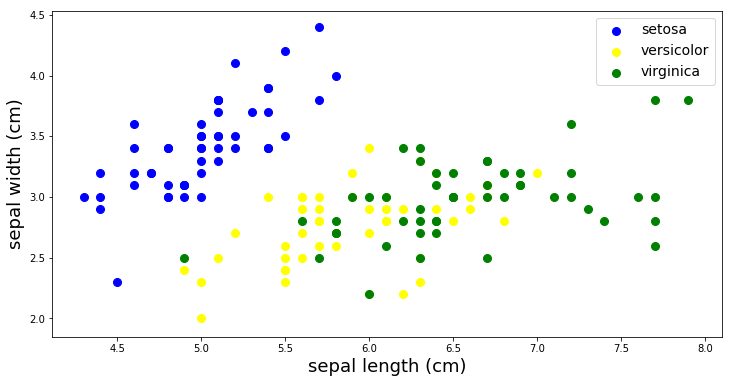

In [113]:
# We write a function so we can reuse it later.
def generate_scatter_plot(X, y):
    class_names = data.target_names
    class_colours = ['blue','yellow','green']

    fig = plt.figure(figsize=(12, 6)) # increase size of plot
    
    for i, class_colour in enumerate(class_colours):
        # plot the points only of this class label
        plt.scatter(X[y == i, 0], X[y == i, 1], c=class_colour, label=class_names[i]) 

    plt.xlabel(data.feature_names[0]) # label the axis
    plt.ylabel(data.feature_names[1])
    plt.legend(loc="best") # with legend

generate_scatter_plot(X_2, y)

## Binary Classification

We do a "setosa vs others" classification.

In [114]:
from copy import copy
y_setosa = copy(y)
y_setosa[(y == 2) | (y == 1)] = 0
y_setosa[y == 0] = 1

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y_setosa, random_state=42)

In [123]:
clf = LogisticRegression(C=10, penalty="l2")
clf.fit(X_train, y_train)

# C = 1/lambda
# lambda = 0.001, 0.005, 0.01, 0.05, ..., 1, 5, 10, 50

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [124]:
clf.coef_

array([[ 0.61199618,  2.15413469, -3.34691526, -1.5233884 ]])

In [125]:
clf.intercept_

array([0.37333876])

In [126]:
print("Train-Score: %.4f, Test-Accuracy: %.4f" % (clf.score(X_train, y_train), clf.score(X_test, y_test)))

Train-Score: 1.0000, Test-Accuracy: 1.0000


## Multi-class Classification

Now try the multi-class problem. Look up the slides for the multi-class logistic regression.

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :2], y, random_state=42)

In [129]:
n_samples = X_train.shape[0]

In [149]:
clf = LogisticRegression(multi_class="multinomial", 
                         penalty="l2",
                         random_state=42,
                         solver="newton-cg",
                         C=np.Infinity)

In [150]:
clf.fit(X_train, y_train)

LogisticRegression(C=inf, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [151]:
clf.coef_

array([[-54.39919724,  45.16928394],
       [ 26.38372837, -22.93572683],
       [ 28.01546885, -22.23355712]])

In [152]:
clf.score(X_test, y_test)

0.8421052631578947

In [153]:
from sklearn.metrics import classification_report

In [156]:
report = classification_report(y_test, 
                      clf.predict(X_test), 
                      #labels=data.feature_names,
                      target_names=data.target_names
                     )

print(report)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       0.78      0.64      0.70        11
  virginica       0.71      0.83      0.77        12

avg / total       0.85      0.84      0.84        38



In [103]:
from sklearn.model_selection import train_test_split

In [104]:
train_test_split??

# Evaluation

The goal of this lab is to introduce you the most important techniques for evaluating your trained models. The motivation is to be able to select the model that has the best (expected) out-of-sample prediction and to assess the quality of the model.

## 1. Model Selection in a holdout setting

We start with the <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris</a> data set. In a nut shell the iris data set consists out of $4$ features (sepal length, sepal width, petal length, petal width) of three kinds of flowers in the iris family (iris setosa, iris versicolor, iris virginica). It was first used by Fisher to introduce linear discriminant analysis. Our version of the data set has 150 data points with 50 for each class.

In [157]:
from sklearn.datasets import load_iris

iris = load_iris()
print("Loaded %d data points" % len(iris.data))

X, y = iris.data, iris.target

print("Class labels: %s" % list(zip(range(3), iris.target_names)))

Loaded 150 data points
Class labels: [(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]


As a first example we try to classify the iris versicolor with the help of the first two features (that makes visualisation simpler as we do not know PCA yet). 

In [158]:
X_versi = X[:, :2]

y_versi = np.zeros(len(y))
y_versi[y == 1] = 1

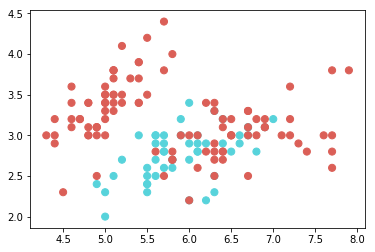

In [159]:
plt.scatter(X_versi[:, 0], X_versi[:, 1], c=y_versi, cmap=get_cmap(2), s=50)

The scatter plot shows that this is going to be a hard seperation problem as the classifier has to predict the red points. 

We split the data into a train and test (holdout) set.

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_versi, y_versi, stratify=y_versi, random_state=3)
train_test_split?

The following function is a little visualization helper that draws the values of the decision function on a heat map given a matplotlib axe.

In [194]:
def show_decision_function(clf, ax):
    xx, yy = np.meshgrid(np.linspace(4.5, 8, 200), np.linspace(1.5, 5.0, 200))
    try:
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    except AttributeError:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=plt.cm.jet)
    ax.set_xlim(4.5, 8)
    ax.set_ylim(1.5, 5.0)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.scatter(X_versi[:, 0], X_versi[:, 1], c=y_versi, s=100)

Text(0.5,1,'Nystrom sampling + LogReg')

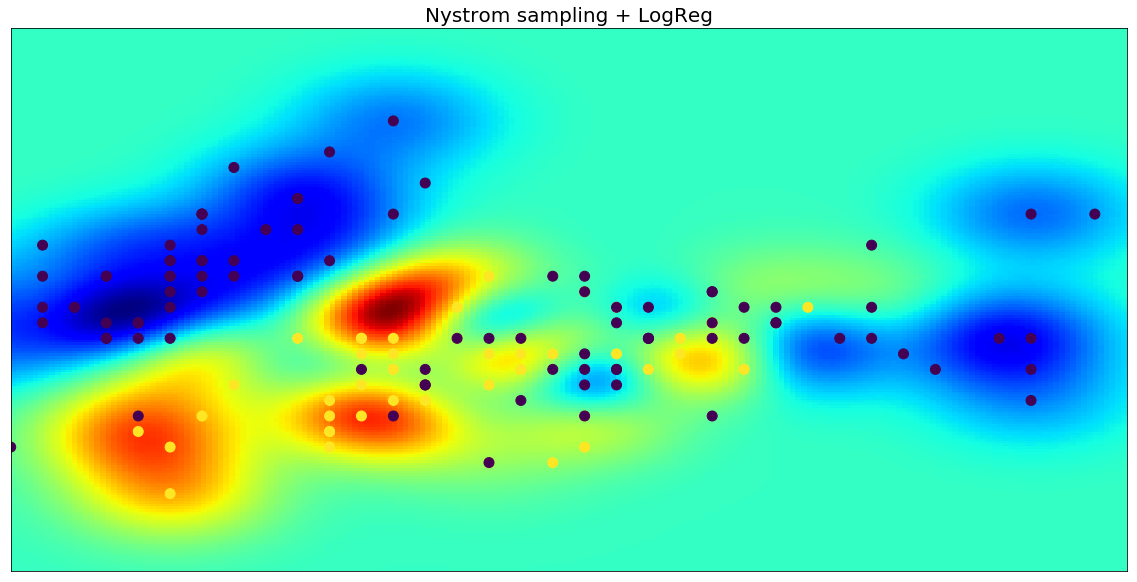

In [199]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.kernel_approximation import Nystroem

clf = make_pipeline(Nystroem(gamma=10., n_components=50, random_state=42),
                   LogisticRegression(C=100))
clf.fit(X_train, y_train)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
show_decision_function(clf, ax)
ax.set_title('Nystrom sampling + LogReg')

Text(0.5,1,'Random Forest')

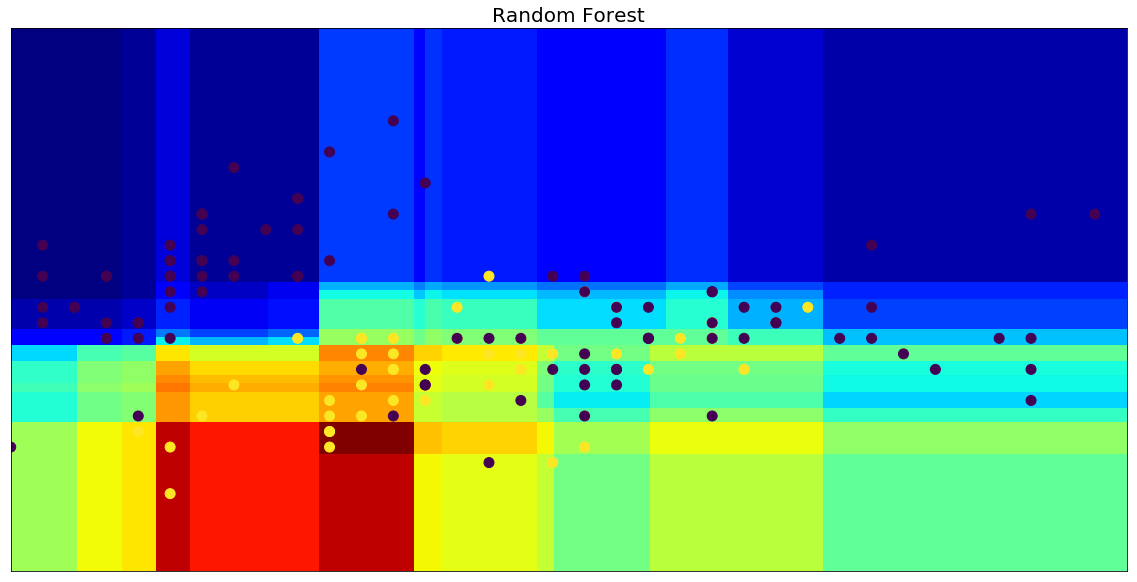

In [196]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=3)
clf.fit(X_train, y_train)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
show_decision_function(clf, ax)
ax.set_title('Random Forest')

The scikit-learn metrics package offers the basic evaluation routines.

In [188]:
%whos

Variable                  Type                        Data/Info
---------------------------------------------------------------
ElasticNet                ABCMeta                     <class 'sklearn.linear_mo<...>nate_descent.ElasticNet'>
GridSearchCV              ABCMeta                     <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
KFold                     ABCMeta                     <class 'sklearn.model_selection._split.KFold'>
KNeighborsClassifier      ABCMeta                     <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
Lasso                     ABCMeta                     <class 'sklearn.linear_mo<...>oordinate_descent.Lasso'>
LinearRegression          ABCMeta                     <class 'sklearn.linear_mo<...>l.base.LinearRegression'>
LogisticRegression        type                        <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
Nystroem                  type                        <class 'sklearn.kernel_approximation.Nystroem'>
OLS      

In [200]:
from sklearn import metrics

y_pred = clf.predict(X_test)

print("Test Precision: %.3f" % metrics.precision_score(y_test, y_pred))
print("Test Recall: %.3f" % metrics.recall_score(y_test, y_pred))
print("Test F-Score: %.3f" % metrics.f1_score(y_test, y_pred))

Test Precision: 0.750
Test Recall: 0.692
Test F-Score: 0.720


Recalling the definition of precision and recall the numbers mean that 2/3 of the positive predictions are correct and that 1/2 of the test iris versicolor has been found by the classifier. The F-Score is then just the arithmetic mean of both (7/12).

To plot the ROC curve the decision function needs to be explicitly evaluated. The following code block also contains a helper function to plot ROC curves.

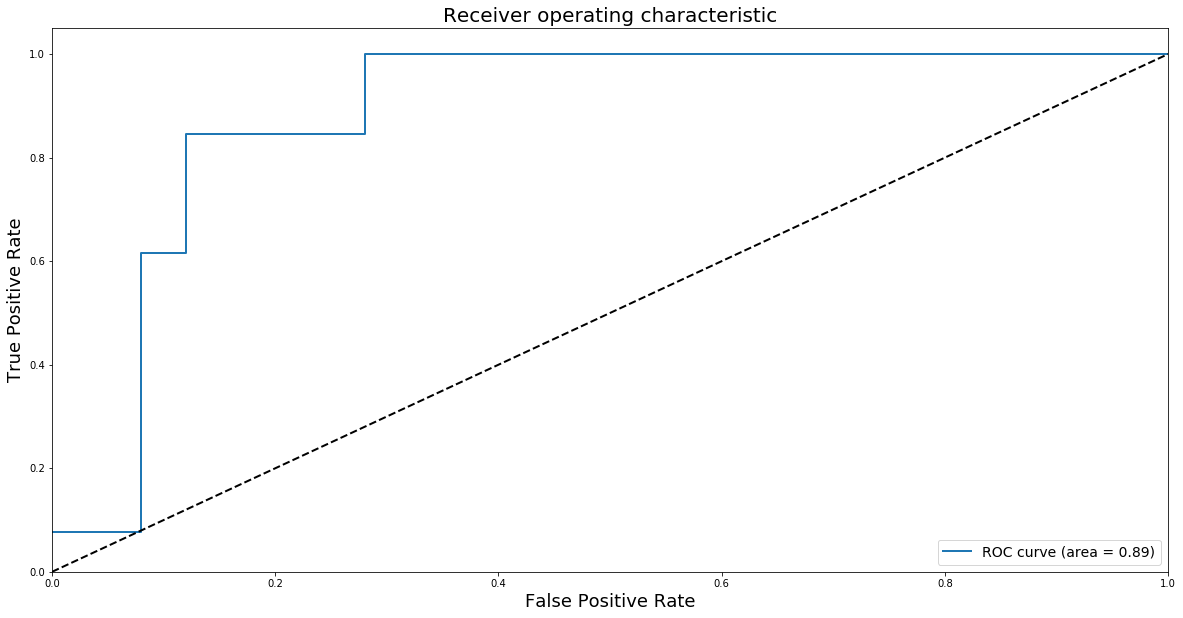

In [201]:
y_score = clf.decision_function(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_score, pos_label=1)


# helper to plot ROC curves
def plot_roc_curves(fprs, tprs):
    fig = plt.figure(figsize=(20,10))
    for fpr, tpr in zip(fprs, tprs):
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc_curves([fpr], [tpr])

<b>Ex. 1.1</b>: Train four different classifiers (on the train/test data we used in the prior example) and put them into the list 'clfs' (you can add elements to a list via the 'append' method. Analyse the visualisations that are created by the code blocks after (Is there a uniquely best classifier?). Set the $\gamma$ parameter to $1$ and vary the $C$. Before trying out values be sure to check the <a href="http://scikit-learn.org/stable/modules/svm.html">SVM</a> documentation in scikit-learn.

Hint: Set a name to your classifier, i.e. clf.name = "Some description" to keep track of what you have done.

In [ ]:
# Exercise 1.1
from sklearn.svm import SVC
clfs = []

In [203]:
# %load solutions/eval_11.py
# Solution Exercise 1.1
from sklearn.svm import SVC
clfs = []
Cs = [0.1, 1, 10, 25]
for C in Cs:
    clf = SVC(gamma=1, C=C)
    clf.fit(X_train, y_train)
    clf.name = 'C = {}'.format(C)
    clfs.append(clf)

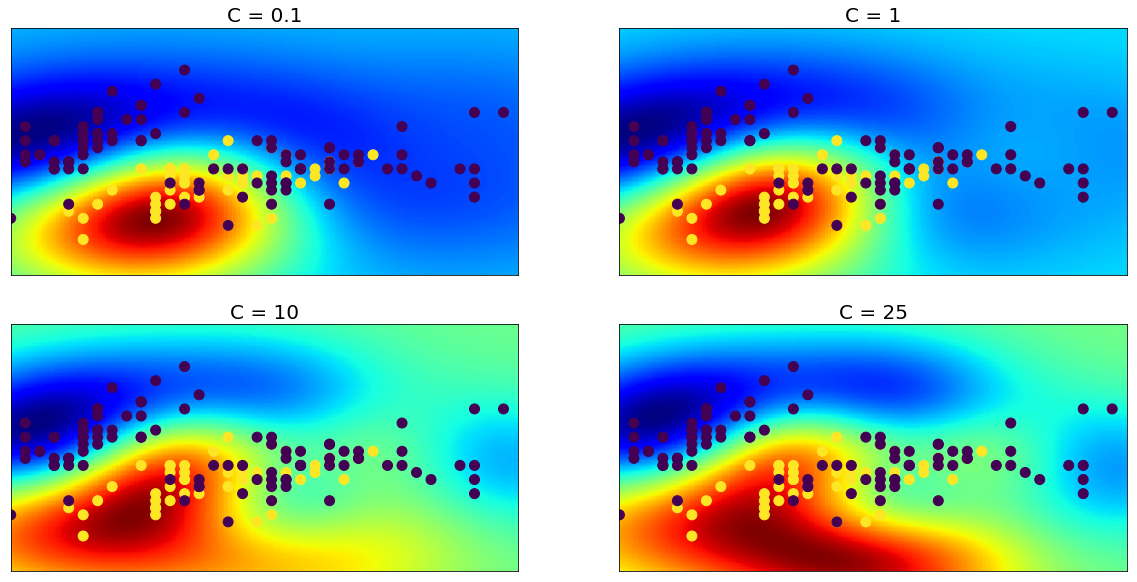

In [204]:
# This code visualises the decision functions of the four different classifiers.

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for clf, ax in zip(clfs, axes.ravel()):
    show_decision_function(clf, ax)
    ax.set_title(clf.name)

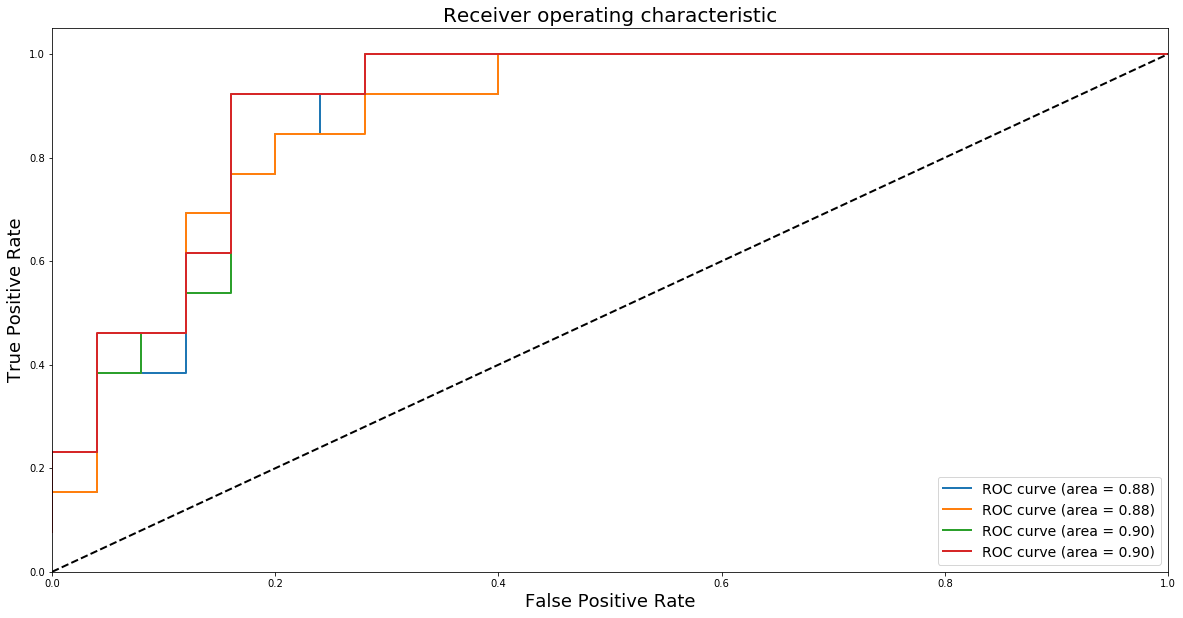

In [205]:
# draw the roc curves.

fprs, tprs = [], []

for clf in clfs:
    y_score = clf.decision_function(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_score, pos_label=1)
    fprs.append(fpr)
    tprs.append(tpr)
    
plot_roc_curves(fprs, tprs)

## 2. Cross-Validation

Having only 150 samples it seems like a waste to waste 30% of the training samples into the holdout set. To avoid this we can use CV - as presented in the lecture - to trade computational power for a better use of our data. 

The following code creates a list of masks, where every mask can be used as an index set to select the test samples.

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]]
135


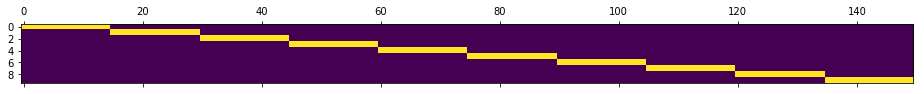

In [206]:
def create_kfold_mask(num_samples, k):
    masks = []
    fold_size = num_samples // k
    
    for i in range(k):
        mask = np.zeros(num_samples, dtype=bool)
        mask[i*fold_size:(i+1)*fold_size] = True
        masks.append(mask)
        
    return masks

masks = create_kfold_mask(150, 10)
plt.matshow(masks)

mask = masks[0]
print(X_versi[mask]) # selects the test sample
print(len(X_versi[~mask])) # selects training sample, ~ is binary negation

Since the data is sorted by the labels the $k$-fold CV will likely have trouble with class imbalances in the some cases. A random shuffle solves this problem.

In [207]:
print(y_versi)
num_sample = len(X_versi)
np.random.seed(3)
permutation = np.random.permutation(num_sample)
X_versi, y_versi = X_versi[permutation], y_versi[permutation]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


<b>Ex. 2.1</b>: Implement the function scores = cv_k_fold_classifier(clf, k, X, y) that fits the classifier clf on the k-fold cvs of X and y. It returns two lists of scores: the training and test scores of each fold. Interpret the results of the code block after.

In [208]:
# Exercise 2.1

def cv_k_fold_classifier(clf, k, X, y):
    training_scores = []
    test_scores = []
        
    # Your code

    return training_scores, test_scores
    

In [242]:
# Solution Exercise 2.1

from sklearn.metrics import f1_score
def cv_k_fold_classifier(clf, k, X, y):
    training_scores = []
    test_scores = []
   
    # Your code
    n = len(X)
    masks = create_kfold_mask(n, k)
    
    for mask in masks:
        X_train, y_train = X[~mask], y[~mask]
        clf.fit(X_train, y_train)
        # training_scores.append(clf.score(X_train, y_train))
        training_scores.append(f1_score(clf.predict(X_train), y_train))
        X_test, y_test = X[mask], y[mask]
        # test_scores.append(clf.score(X_test, y_test))
        test_scores.append(f1_score(clf.predict(X_test), y_test))
    
    return training_scores, test_scores

In [223]:
np.power(10, np.linspace(-5, 5, 20))

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

/Users/uberwach/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


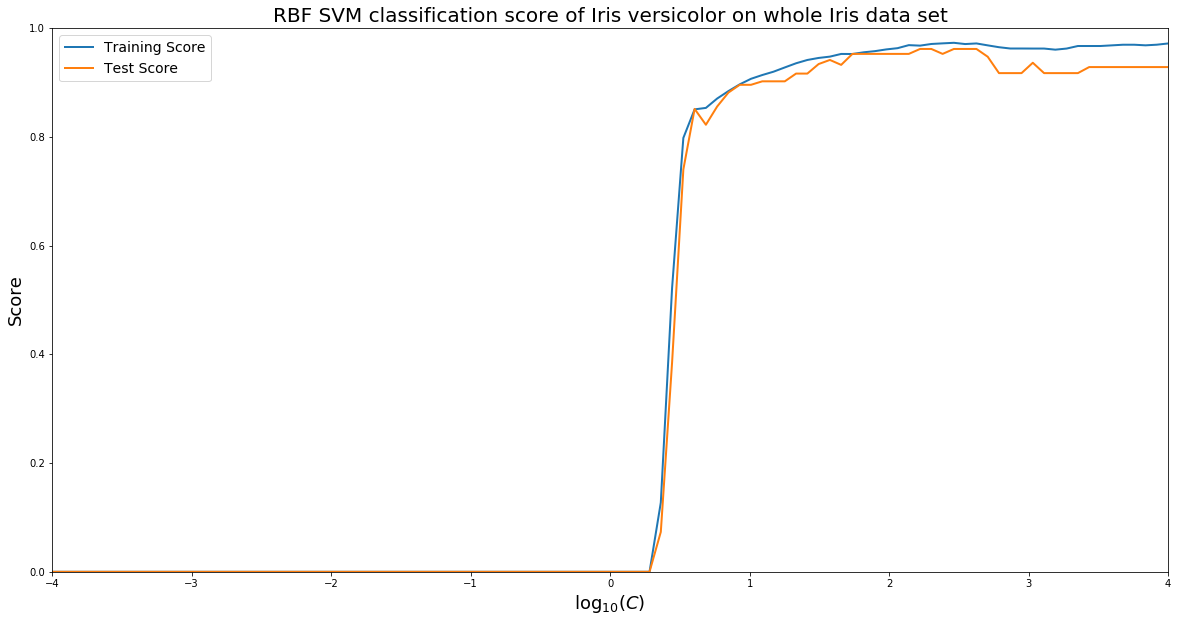

In [243]:
# Train SVM with complete data now and use k-fold CV
# still needs to shuffle data
X_versi_2 = X[permutation]

y_versi_2 = np.zeros(len(y))
y_versi_2[y == 1] = 1
y_versi_2 = y_versi_2[permutation]

Cs = np.linspace(-4, 4, 100)

training_scores = []
test_scores = []


for C in Cs:
    clf = SVC(C=10.**C, gamma=0.01) # 10^C
    clf.name = "SVM with C = 10^{}".format(C) 
    # [np.mean(xs) for xs in cv_k_fold_classifier(clf, 10, X_versi_2, y_versi_2)]
    training_score, test_score = map(lambda xs: np.mean(xs), cv_k_fold_classifier(clf, 10, X_versi_2, y_versi_2))
    training_scores.append(training_score)
    test_scores.append(test_score)
    
plt.figure(figsize=(20, 10))
plt.plot(Cs, training_scores, label='Training Score')
plt.plot(Cs, test_scores, label = 'Test Score')
plt.xlim(min(Cs), max(Cs))
plt.ylim(min(min(training_scores), min(test_scores)), 1.00)
plt.xlabel('$\log_{10}(C)$')
plt.ylabel('Score')
plt.title('RBF SVM classification score of Iris versicolor on whole Iris data set')
plt.legend()
plt.show()   

Scikit-learn also contains procedures for creating CV. One of them is stratified k-fold CV, which is k-fold while ensuring that there is no local class imbalance. 

/Users/uberwach/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


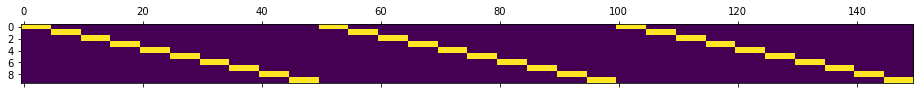

In [252]:
import sklearn.cross_validation as cv

# Helper to plot scikit CV

def plot_cv(cv):
    masks = []
    for train, test in cv: # this shows you how to use the cv results!
        # i.e. X_train, y_train = X[train], y[train]
        mask = np.zeros(cv.n, dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.matshow(masks)
    
kfold = cv.StratifiedKFold(y, n_folds=10) # using it on the original multi-class labels
plot_cv(kfold)

It is interesting to note how the folds partition into the regions of the three class labels.

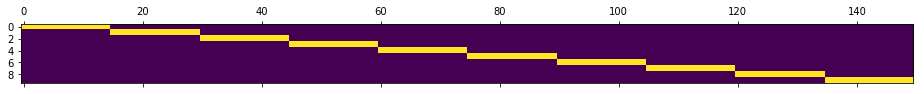

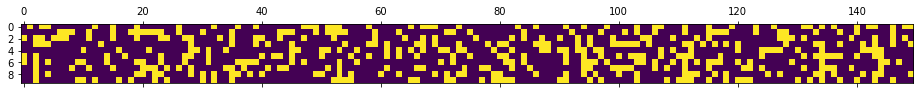

In [253]:
# Other CV methods do not require labels only the length of the labels
plot_cv(cv.KFold(len(y), n_folds=10)) # like we implemented
plot_cv(cv.ShuffleSplit(len(y), n_iter=10, test_size=0.3)) # like training_test_split with test 30% of data

<b>Ex. 2.2</b>: Using the whole dataset build any classifier that detects iris virginica. 
Try two cross validation strategies:

a) stratified 2-fold CV

b) LOOCV (leave one out cross validation)

Choose the best models in a) and b). Compare those two models, which one is likely to be better? What do the ROC curves tell you? Should an additional holdout set be used?

Hint: The accuracy is the mean of the accuracy on every test set. In LOOCV this is the one test sample. Thus, the overall accuracy is equivalent to the ratio of folds in which the test sample was correctly predicted. 

In [258]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

base_clf = LogisticRegression(C=1, solver="saga", max_iter=10000, multi_class="multinomial")

param = {
    "C": [0.03, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ("l1", "l2")
}

clf = GridSearchCV(base_clf, param, scoring="accuracy", cv=ShuffleSplit(3), verbose=1)
scores = cross_val_score(clf, X, y, scoring="accuracy", cv=ShuffleSplit(5), n_jobs=-1, verbose=1)

print("%.4f (±%.4f)" % (np.mean(scores), np.std(scores)))

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    1.9s finished


Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    1.9s finished


Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    1.9s finished


Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    2.0s finished


Fitting 3 folds for each of 14 candidates, totalling 42 fits
1.0000 (±0.0000)
CPU times: user 9.84 s, sys: 65.5 ms, total: 9.9 s
Wall time: 9.97 s


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.0s finished


In [259]:
clf.fit(X, y)
y_pred = clf.predict_proba(X)

mask = y_pred >= 0.5
y_pred[mask] = 1
y_pred[~mask] = 0
y_pred

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    2.3s finished


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
# Exercise 2.2

/Users/uberwach/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best Classifier (2-fold): SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best Accuracy (2-fold): 0.6667


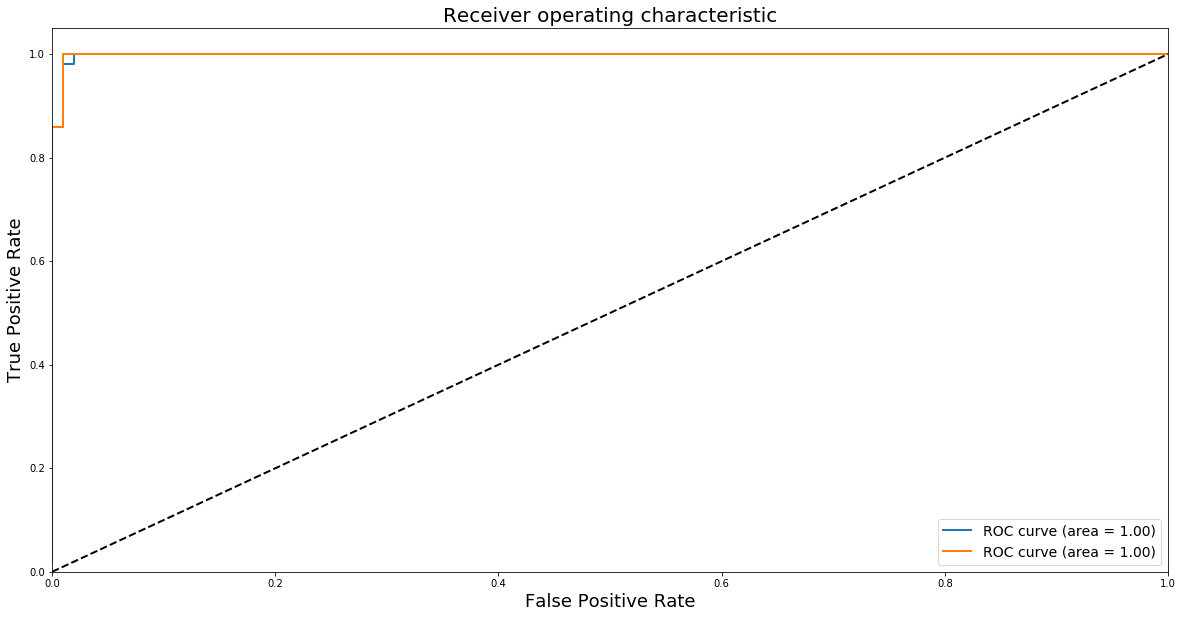

Best Classifier (LOOCV): SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best Accuracy (LOOCV): 0.9867


In [260]:
# Solution Exercise 2.2

virgin_idx = y == 2
y_virgin = np.zeros(len(y))
y_virgin[virgin_idx] = 1

from sklearn import grid_search
from sklearn.cross_validation import LeaveOneOut, StratifiedKFold

parameters = {
    'kernel':('linear', 'rbf'), 
    'C':[0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]
}

svc = SVC()

# a)
clf = grid_search.GridSearchCV(svc, parameters, scoring='accuracy', cv=StratifiedKFold(y_virgin, 2))
clf.fit(X, y_virgin) 

best_clf_a = clf.best_estimator_

y_score = best_clf_a.decision_function(X)
fpr_a, tpr_a, _ = metrics.roc_curve(y_virgin, y_score, pos_label=1)

print("Best Classifier (2-fold): %s" % best_clf_a)
print("Best Accuracy (2-fold): %.4f" % clf.best_score_)
# b)
clf = grid_search.GridSearchCV(svc, parameters, scoring='accuracy', cv=LeaveOneOut(150))
clf.fit(X, y_virgin)   

best_clf_b = clf.best_estimator_

y_score = best_clf_b.decision_function(X)
fpr_b, tpr_b, _ = metrics.roc_curve(y_virgin, y_score, pos_label=1)
plot_roc_curves([fpr_a, fpr_b], [tpr_a, tpr_b])

print("Best Classifier (LOOCV): %s" % best_clf_b)
print("Best Accuracy (LOOCV): %.4f" % clf.best_score_)

### Validation curves

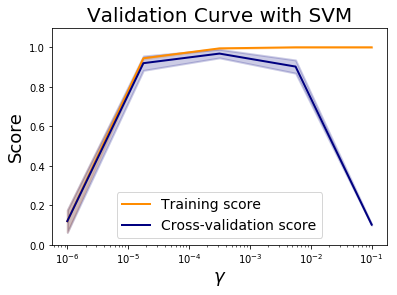

In [261]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## 3. Wrapping up: Politician recognition

This section is optional and supposed to be a playground to try out things presented in the lectures so far. Running the next cell loads the data set that loads about 1300 images of politicians of the era of the war in Iraq. As this data set is about 200 MB this can take a while.

In [ ]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                                       data_home='datasets')
print("Loaded %d data points with %d features" % (lfw_people.data.shape[0], lfw_people.data.shape[1]))
print("Names of politicians: %s" % lfw_people.target_names)

The following code plots some images, feel free to use it.

In [ ]:
fig = plt.figure(figsize=(12, 8))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[]) # xticks / yticks = [] ensures no border
    ax.imshow(lfw_people.images[i], cmap=plt.cm.bone)
    ax.set_title(lfw_people.target_names[lfw_people.target[i]])

<b>Ex. 3.1 (Optional)</b>: Train a classifier for the politician recognition problem. Ideally, you should solve the multiclass problem and use CV and scoring techniques. You can also train a binary classifier to detect one of the politicians.

Show what you can!

In [ ]:
# simple train test split (can be used, but you can also do CV based approaches).
X_train, X_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, random_state=3)